# EDA(Exploratory Data Analysis)

## 1 Import Libraries

In [3]:
#!pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


## 2 Load Data


In [6]:
df =pd.read_csv('data_clean.csv')
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [7]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


Mean=Median     Normal Distribution
Mean> Meadian +/Right Skewness
Mean<Meadian  -/Left  Skewness

In [9]:
df.describe()



,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,158.000000,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,79.500000,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,45.754781,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,40.250000,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,79.500000,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,118.750000,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [10]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [11]:
df.shape

(158, 10)

In [12]:
df.describe(include=object)# Check for Object Data type

,Temp C,Month,Weather
count,158,158,155
unique,41,6,3
top,81,9,S
freq,11,34,59


In [13]:
df['Month'].unique()# Unique values in month Column

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [14]:
df['Weather'].unique()

array(['S', 'C', 'PS', nan], dtype=object)

In [15]:
df['Weather'].value_counts()

Weather
S     59
C     49
PS    47
Name: count, dtype: int64

In [16]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [17]:
df['Month']=df['Month'].replace('May','5')# Assigning Permanent change through operator

In [18]:
df['Month'].dtype

dtype('O')

In [19]:
df['Month'].unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [21]:
df['Month'].unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [22]:
df['Month']=df['Month'].replace({'May':'5'})

In [23]:
df['Month'].unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [24]:
df["Month"]=df["Month"].astype(int)# Covert object Data type to int

In [25]:
df["Month"].dtypes

dtype('int32')

In [26]:
df['Month'].unique()

array([5, 6, 7, 8, 9])

# 3 Duplicate

In [28]:
df.duplicated()  #False =0 True=1

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool

In [29]:
df.duplicated().sum()

0

In [30]:
#drop  duplicate -Row

df.drop_duplicates(inplace=True)
#OR
#df=df.drop_duplicates()

In [31]:
# Drop column Year-Varience=0
df.drop(columns=['Year'],inplace=True)
#df=df.drop(columns=['Year'])
df.drop(columns=['Unnamed: 0'],inplace=True)



In [32]:
df.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Temp,Weather
0,41.0,190.0,7.4,67,5,1,67,S
1,36.0,118.0,8.0,72,5,2,72,C
2,12.0,149.0,12.6,74,5,3,74,PS
3,18.0,313.0,11.5,62,5,4,62,S
4,NaN,NaN,14.3,56,5,5,56,S


In [33]:
df['Wind'].mean()

9.957594936708862

In [34]:
df['Wind'].median()

9.7

In [35]:
df['Wind'].std()

3.5112611250634505

In [36]:
df['Weather'].mode() # Object

0    S
Name: Weather, dtype: object

# 4 Rename Column

In [38]:
df.rename(columns={'Solar.R':'Solar','Temp':'Tempreture'},inplace=True)#inplace=True permanetly Save changes in Data

In [39]:
df.head()

,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather
0,41.0,190.0,7.4,67,5,1,67,S
1,36.0,118.0,8.0,72,5,2,72,C
2,12.0,149.0,12.6,74,5,3,74,PS
3,18.0,313.0,11.5,62,5,4,62,S
4,NaN,NaN,14.3,56,5,5,56,S


In [40]:
# 5 to 25 records from first 3 Column
df.iloc[5:26,0:3] # index must be N-1


,Ozone,Solar,Wind
5,28.0,NaN,14.9
6,23.0,299.0,8.6
7,19.0,99.0,13.8
8,8.0,19.0,20.1
9,NaN,194.0,8.6
10,7.0,NaN,6.9
11,16.0,256.0,9.7
12,11.0,290.0,9.2
13,14.0,274.0,10.9
14,18.0,65.0,13.2


In [41]:
df.loc[5:25,'Ozone':'Wind']# Mention Column Name

,Ozone,Solar,Wind
5,28.0,NaN,14.9
6,23.0,299.0,8.6
7,19.0,99.0,13.8
8,8.0,19.0,20.1
9,NaN,194.0,8.6
10,7.0,NaN,6.9
11,16.0,256.0,9.7
12,11.0,290.0,9.2
13,14.0,274.0,10.9
14,18.0,65.0,13.2


# 5 Missing Values

In [43]:
df.isna().sum()

Ozone         38
Solar          7
Wind           0
Temp C         0
Month          0
Day            0
Tempreture     0
Weather        3
dtype: int64

In [44]:
df['Temp C']=df['Tempreture']

In [45]:
df.head()

,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather
0,41.0,190.0,7.4,67,5,1,67,S
1,36.0,118.0,8.0,72,5,2,72,C
2,12.0,149.0,12.6,74,5,3,74,PS
3,18.0,313.0,11.5,62,5,4,62,S
4,NaN,NaN,14.3,56,5,5,56,S


In [46]:
#df.drop(columns=['Temp C'],inplace=True)
df

,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather
0,41.0,190.0,7.4,67,5,1,67,S
1,36.0,118.0,8.0,72,5,2,72,C
2,12.0,149.0,12.6,74,5,3,74,PS
3,18.0,313.0,11.5,62,5,4,62,S
4,NaN,NaN,14.3,56,5,5,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,67,C
154,30.0,193.0,6.9,70,9,26,70,PS
155,NaN,145.0,13.2,77,9,27,77,S
156,14.0,191.0,14.3,75,9,28,75,S


In [47]:
df['compare_colums']=df['Temp C'].equals(df['Tempreture'])
df['compare_colums']

0      True
1      True
2      True
3      True
4      True
       ... 
153    True
154    True
155    True
156    True
157    True
Name: compare_colums, Length: 158, dtype: bool

In [48]:
df.head()

,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather,compare_colums
0,41.0,190.0,7.4,67,5,1,67,S,True
1,36.0,118.0,8.0,72,5,2,72,C,True
2,12.0,149.0,12.6,74,5,3,74,PS,True
3,18.0,313.0,11.5,62,5,4,62,S,True
4,NaN,NaN,14.3,56,5,5,56,S,True


In [49]:
df.drop(columns=['compare_colums'],inplace=True)

1-5%      Drop Row
6-40%     Replace (Mean-no outliers ,Median-outliers,Mode-Object
50%       Drop Column

In [51]:
# Calculate the percentage  of missing value in each column
for i in df.isna().sum():
    print(round(i/len(df)*100,2),'%')
   

24.05 %
4.43 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
1.9 %



# 6 Visualization

array([[<Axes: title={'center': 'Ozone'}>,
        <Axes: title={'center': 'Solar'}>,
        <Axes: title={'center': 'Wind'}>],
       [<Axes: title={'center': 'Temp C'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Tempreture'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1000x500 with 0 Axes>

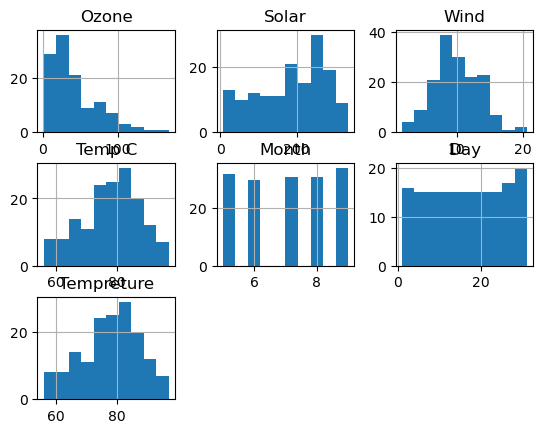

In [53]:
plt.figure(figsize=(10,5))
df.hist()

<Axes: ylabel='Count'>

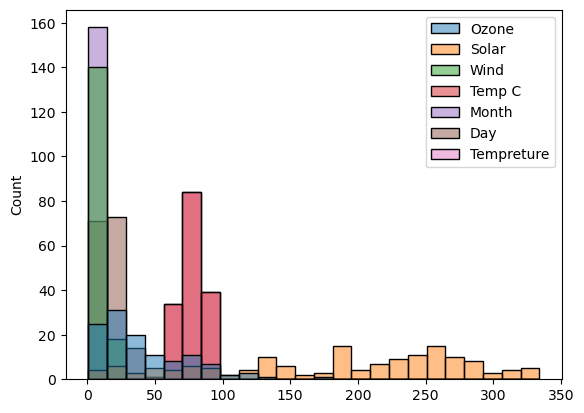

In [54]:
sns.histplot(df)

<Figure size 1500x500 with 0 Axes>

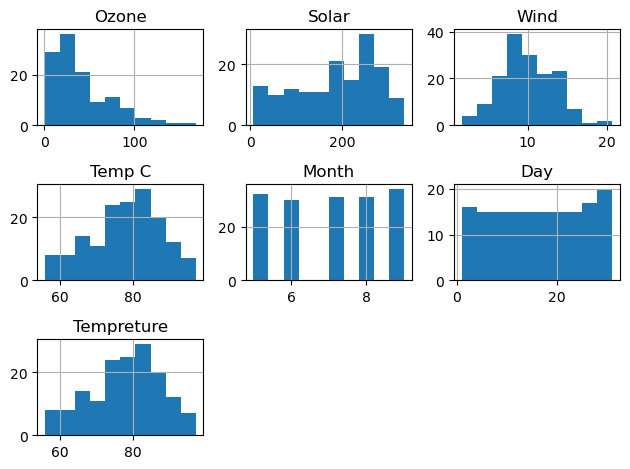

In [55]:
plt.figure(figsize=(15,5))
df.hist()
plt.tight_layout()# To Avoid Overlapping of Chart Title

<Axes: ylabel='Ozone'>

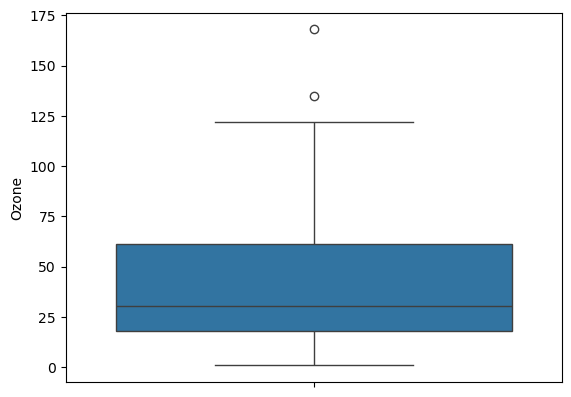

In [56]:
sns.boxplot(df['Ozone'])

In [57]:
# Outlairs are present in Ozone replace NaN values with Median
ozone_Median=df['Ozone'].median()
ozone_Median

30.5

In [58]:
df['Ozone'].fillna(ozone_Median,inplace=True)

In [59]:
df['Solar'].mean()

185.40397350993376

In [60]:
df['Solar'].fillna(df['Solar'].mean(),inplace=True)

In [61]:
df['Wind'].fillna(df['Wind'].median(),inplace=True)

<Axes: ylabel='Solar'>

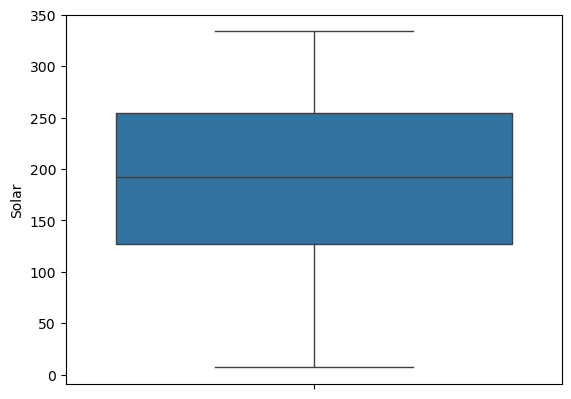

In [62]:
sns.boxplot(df['Solar'])

<Axes: ylabel='Wind'>

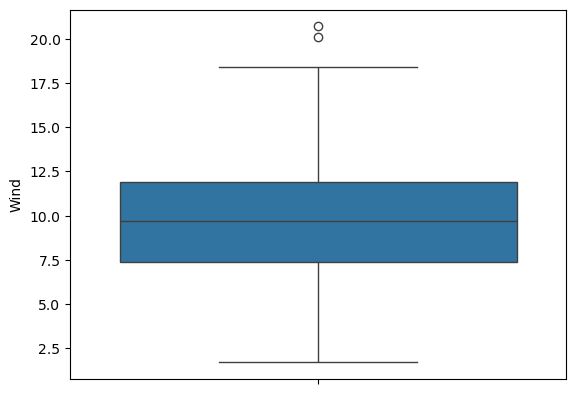

In [63]:
sns.boxplot(df['Wind'])

In [64]:
df['Ozone'].isna().sum()


0

In [65]:
df['Solar'].isna().sum()

0

In [66]:
df['Wind'].isna().sum()

0

<Axes: xlabel='Solar', ylabel='Count'>

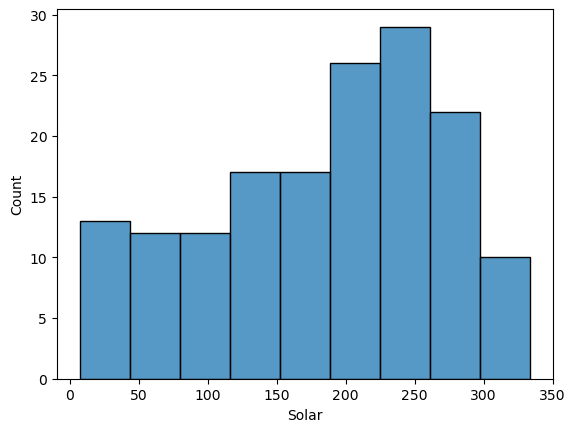

In [67]:
sns.histplot(df['Solar'])

# 7 Outliers

In [69]:
def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df        


In [70]:
outlier_Detection(df,['Ozone'])

,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather
0,41.0,190.000000,7.4,67,5,1,67,S
1,36.0,118.000000,8.0,72,5,2,72,C
2,12.0,149.000000,12.6,74,5,3,74,PS
3,18.0,313.000000,11.5,62,5,4,62,S
4,30.5,185.403974,14.3,56,5,5,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.000000,7.4,67,5,1,67,C
154,30.0,193.000000,6.9,70,9,26,70,PS
155,30.5,145.000000,13.2,77,9,27,77,S
156,14.0,191.000000,14.3,75,9,28,75,S


Text(0.5, 1.0, 'Ozone Column Boxplot')

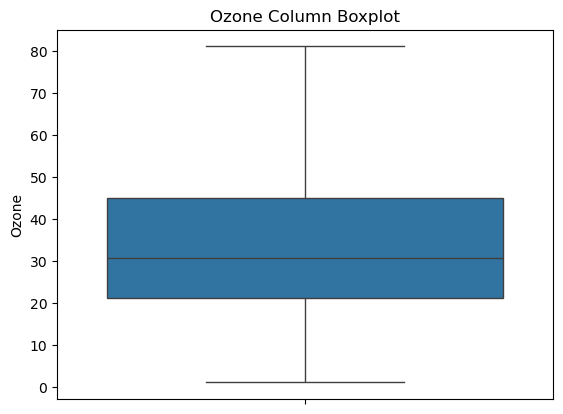

In [71]:
sns.boxplot(df['Ozone'])
plt.title('Ozone Column Boxplot')

# 8Transformation


*Machine not understand text data
*Only Number
*So,convert all categorical to numerical

In [74]:
# Get Dummies()
df=pd.get_dummies(df,columns=['Weather'],dtype=int)
df

,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,67,5,1,67,0,0,1
1,36.0,118.000000,8.0,72,5,2,72,1,0,0
2,12.0,149.000000,12.6,74,5,3,74,0,1,0
3,18.0,313.000000,11.5,62,5,4,62,0,0,1
4,30.5,185.403974,14.3,56,5,5,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
153,41.0,190.000000,7.4,67,5,1,67,1,0,0
154,30.0,193.000000,6.9,70,9,26,70,0,1,0
155,30.5,145.000000,13.2,77,9,27,77,0,0,1
156,14.0,191.000000,14.3,75,9,28,75,0,0,1


# 9 Correlation Coefficient

-1..........0.................+1
High       Low               High

Graded interpretation : 
0.1-0.3 = weak
0.4-0.7 = moderate
0.8-1.0=strong correlation

In [77]:
#df.corr()
df.corr()

,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather_C,Weather_PS,Weather_S
Ozone,1.000000,0.315871,-0.518110,0.661306,0.174623,-0.051518,0.661306,0.090100,-0.007288,-0.096518
Solar,0.315871,1.000000,-0.055092,0.260473,-0.079196,-0.149606,0.260473,0.050875,-0.081451,0.068409
Wind,-0.518110,-0.055092,1.000000,-0.441247,-0.157623,0.040151,-0.441247,-0.033316,-0.009125,0.029913
Temp C,0.661306,0.260473,-0.441247,1.000000,0.402942,-0.124538,1.000000,0.000491,-0.059551,0.028073
Month,0.174623,-0.079196,-0.157623,0.402942,1.000000,0.052646,0.402942,-0.062512,0.053228,-0.007912
Day,-0.051518,-0.149606,0.040151,-0.124538,0.052646,1.000000,-0.124538,-0.038615,0.002628,0.056353
Tempreture,0.661306,0.260473,-0.441247,1.000000,0.402942,-0.124538,1.000000,0.000491,-0.059551,0.028073
Weather_C,0.090100,0.050875,-0.033316,0.000491,-0.062512,-0.038615,0.000491,1.000000,-0.436287,-0.517599
Weather_PS,-0.007288,-0.081451,-0.009125,-0.059551,0.053228,0.002628,-0.059551,-0.436287,1.000000,-0.502338
Weather_S,-0.096518,0.068409,0.029913,0.028073,-0.007912,0.056353,0.028073,-0.517599,-0.502338,1.000000


<Axes: >

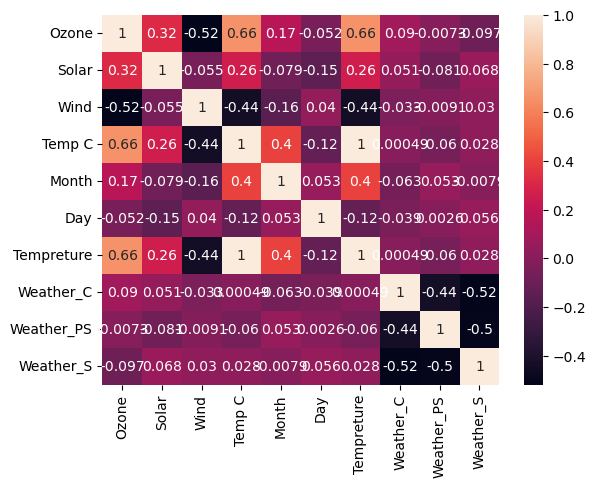

In [78]:
sns.heatmap(df.corr(),annot=True)
#plt.title('Correlation Chart')#Annot for Values inside the Box annot=True

# 10 Normalization of the data

* Standardization-StandardScalar Mean=0 standard Deviation =1 Z-score
* Normalization-MinMaxScalar-Values in the range of 0 to 1


In [81]:
# Standardize data (0 mean, 1 stdev)
#!pip install scikit-learn    First time
# 1 Reposatory -Anaconda 
# 2 Library-Sklearn 
# 3 Module-preprocessing 
# 4 Classes StandardScaler,MinMaxScaler

In [82]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler



# Standard Scalar

In [84]:
sc=StandardScaler() #Convert data in the Standard Scale 0-1

In [175]:
data=sc.fit_transform(df)
data

array([[ 0.20169029,  0.05316535, -0.73071387, ..., -0.6704784 ,
        -0.65070994,  1.29536331],
       [-0.02115632, -0.77970746, -0.55929176, ...,  1.49147236,
        -0.65070994, -0.77198419],
       [-1.09082005, -0.42110944,  0.75494442, ..., -0.6704784 ,
         1.53678305, -0.77198419],
       ...,
       [-0.26628759, -0.46738015,  0.92636654, ..., -0.6704784 ,
        -0.65070994,  1.29536331],
       [-1.00168141,  0.06473303,  1.24064041, ..., -0.6704784 ,
        -0.65070994,  1.29536331],
       [-0.82340412, -0.62932765, -0.55929176, ...,  1.49147236,
        -0.65070994, -0.77198419]])

In [86]:
pd.DataFrame(sc.fit_transform(df))

,0,1,2,3,4,5,6,7,8,9
0,0.201690,0.053165,-0.730714,-1.147590,-1.416904,-1.673198,-1.147590,-0.670478,-0.650710,1.295363
1,-0.021156,-0.779707,-0.559292,-0.612725,-1.416904,-1.561699,-0.612725,1.491472,-0.650710,-0.771984
2,-1.090820,-0.421109,0.754944,-0.398779,-1.416904,-1.450199,-0.398779,-0.670478,1.536783,-0.771984
3,-0.823404,1.475990,0.440671,-1.682455,-1.416904,-1.338700,-1.682455,-0.670478,-0.650710,1.295363
4,-0.266288,0.000000,1.240640,-2.324293,-1.416904,-1.227200,-2.324293,-0.670478,-0.650710,1.295363
...,...,...,...,...,...,...,...,...,...,...
153,0.201690,0.053165,-0.730714,-1.147590,-1.416904,-1.673198,-1.147590,1.491472,-0.650710,-0.771984
154,-0.288572,0.087868,-0.873566,-0.826671,1.372764,1.114289,-0.826671,-0.670478,1.536783,-0.771984
155,-0.266288,-0.467380,0.926367,-0.077860,1.372764,1.225789,-0.077860,-0.670478,-0.650710,1.295363
156,-1.001681,0.064733,1.240640,-0.291806,1.372764,1.337288,-0.291806,-0.670478,-0.650710,1.295363


In [87]:
scaled_data=pd.DataFrame(data,columns=df.columns)
scaled_data

,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather_C,Weather_PS,Weather_S
0,0.201690,0.053165,-0.730714,-1.147590,-1.416904,-1.673198,-1.147590,-0.670478,-0.650710,1.295363
1,-0.021156,-0.779707,-0.559292,-0.612725,-1.416904,-1.561699,-0.612725,1.491472,-0.650710,-0.771984
2,-1.090820,-0.421109,0.754944,-0.398779,-1.416904,-1.450199,-0.398779,-0.670478,1.536783,-0.771984
3,-0.823404,1.475990,0.440671,-1.682455,-1.416904,-1.338700,-1.682455,-0.670478,-0.650710,1.295363
4,-0.266288,0.000000,1.240640,-2.324293,-1.416904,-1.227200,-2.324293,-0.670478,-0.650710,1.295363
...,...,...,...,...,...,...,...,...,...,...
153,0.201690,0.053165,-0.730714,-1.147590,-1.416904,-1.673198,-1.147590,1.491472,-0.650710,-0.771984
154,-0.288572,0.087868,-0.873566,-0.826671,1.372764,1.114289,-0.826671,-0.670478,1.536783,-0.771984
155,-0.266288,-0.467380,0.926367,-0.077860,1.372764,1.225789,-0.077860,-0.670478,-0.650710,1.295363
156,-1.001681,0.064733,1.240640,-0.291806,1.372764,1.337288,-0.291806,-0.670478,-0.650710,1.295363


In [88]:
scaled_data.describe()

,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather_C,Weather_PS,Weather_S
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,-1.236704e-16,1.236704e-16,-2.923119e-16,2.473408e-16,-1.798842e-16,6.745659e-17,2.473408e-16,-6.464590e-17,-9.275281e-17,2.248553e-17
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-1.581083e+00,-2.063720e+00,-2.359224e+00,-2.324293e+00,-1.416904e+00,-1.673198e+00,-2.324293e+00,-6.704784e-01,-6.507099e-01,-7.719842e-01
25%,-6.896962e-01,-6.755984e-01,-7.307139e-01,-6.127251e-01,-7.194873e-01,-8.927018e-01,-6.127251e-01,-6.704784e-01,-6.507099e-01,-7.719842e-01
50%,-2.662876e-01,8.208455e-02,-7.359578e-02,8.259941e-02,-2.207016e-02,-7.056931e-04,8.259941e-02,-6.704784e-01,-6.507099e-01,-7.719842e-01
75%,3.799676e-01,8.050644e-01,5.478094e-01,6.709509e-01,6.753470e-01,8.912904e-01,6.709509e-01,1.491472e+00,1.536783e+00,1.295363e+00
max,1.984463e+00,1.718911e+00,3.069143e+00,2.061600e+00,1.372764e+00,1.671787e+00,2.061600e+00,1.491472e+00,1.536783e+00,1.295363e+00


# MinMaxScalar

In [178]:
mn=MinMaxScaler()

In [186]:
minmax_scaled=pd.DataFrame(mn.fit_transform(df),columns=df.columns)
minmax_scaled

,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather_C,Weather_PS,Weather_S
0,0.50000,0.559633,0.300000,0.268293,0.0,0.000000,0.268293,0.0,0.0,1.0
1,0.43750,0.339450,0.331579,0.390244,0.0,0.033333,0.390244,1.0,0.0,0.0
2,0.13750,0.434251,0.573684,0.439024,0.0,0.066667,0.439024,0.0,1.0,0.0
3,0.21250,0.935780,0.515789,0.146341,0.0,0.100000,0.146341,0.0,0.0,1.0
4,0.36875,0.545578,0.663158,0.000000,0.0,0.133333,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
153,0.50000,0.559633,0.300000,0.268293,0.0,0.000000,0.268293,1.0,0.0,0.0
154,0.36250,0.568807,0.273684,0.341463,1.0,0.833333,0.341463,0.0,1.0,0.0
155,0.36875,0.422018,0.605263,0.512195,1.0,0.866667,0.512195,0.0,0.0,1.0
156,0.16250,0.562691,0.663158,0.463415,1.0,0.900000,0.463415,0.0,0.0,1.0


In [188]:
minmax_scaled.describe()


,Ozone,Solar,Wind,Temp C,Month,Day,Tempreture,Weather_C,Weather_PS,Weather_S
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.443434,0.545578,0.434610,0.529948,0.507911,0.500211,0.529948,0.310127,0.297468,0.373418
std,0.281354,0.265207,0.184803,0.228729,0.359605,0.299906,0.228729,0.464016,0.458598,0.485250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.366972,0.300000,0.390244,0.250000,0.233333,0.390244,0.000000,0.000000,0.000000
50%,0.368750,0.567278,0.421053,0.548780,0.500000,0.500000,0.548780,0.000000,0.000000,0.000000
75%,0.550000,0.758410,0.535526,0.682927,0.750000,0.766667,0.682927,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Ozone', ylabel='Count'>

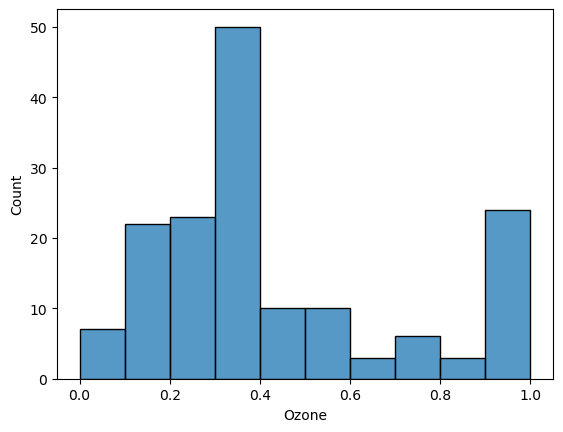

In [93]:
sns.histplot(minmax_scaled['Ozone'])

<Axes: xlabel='Solar', ylabel='Count'>

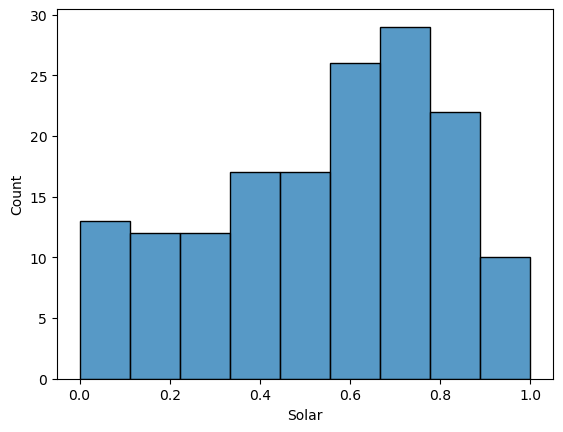

In [94]:
sns.histplot(minmax_scaled['Solar'])